In [4]:
# graph out the results above
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Dictionary to hold the performance metrics
performance_metrics = {
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Append the metrics
    performance_metrics["Accuracy"].append(accuracy)
    performance_metrics["Precision"].append(precision)
    performance_metrics["Recall"].append(recall)
    performance_metrics["F1 Score"].append(f1)

# Prepare the results for display
results = {
    "Model": list(models.keys()),
    "Accuracy": performance_metrics["Accuracy"],
    "Precision": performance_metrics["Precision"],
    "Recall": performance_metrics["Recall"],
    "F1 Score": performance_metrics["F1 Score"]
}

results


{'Model': ['Random Forest',
  'Logistic Regression',
  'SVM',
  'KNN',
  'Decision Tree'],
 'Accuracy': [0.9, 0.855, 0.845, 0.81, 0.875],
 'Precision': [0.9484536082474226,
  0.9148936170212766,
  0.8958333333333334,
  0.8791208791208791,
  0.9270833333333334],
 'Recall': [0.8598130841121495,
  0.8037383177570093,
  0.8037383177570093,
  0.7476635514018691,
  0.8317757009345794],
 'F1 Score': [0.9019607843137255,
  0.8557213930348259,
  0.8472906403940886,
  0.808080808080808,
  0.8768472906403941]}

In [8]:
# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Set the Model column as the index
results_df.set_index("Model", inplace=True)

results_df


,Accuracy,Precision,Recall,F1 Score
Model,,,,
Random Forest,0.900,0.948454,0.859813,0.901961
Logistic Regression,0.855,0.914894,0.803738,0.855721
SVM,0.845,0.895833,0.803738,0.847291
KNN,0.810,0.879121,0.747664,0.808081
Decision Tree,0.875,0.927083,0.831776,0.876847


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

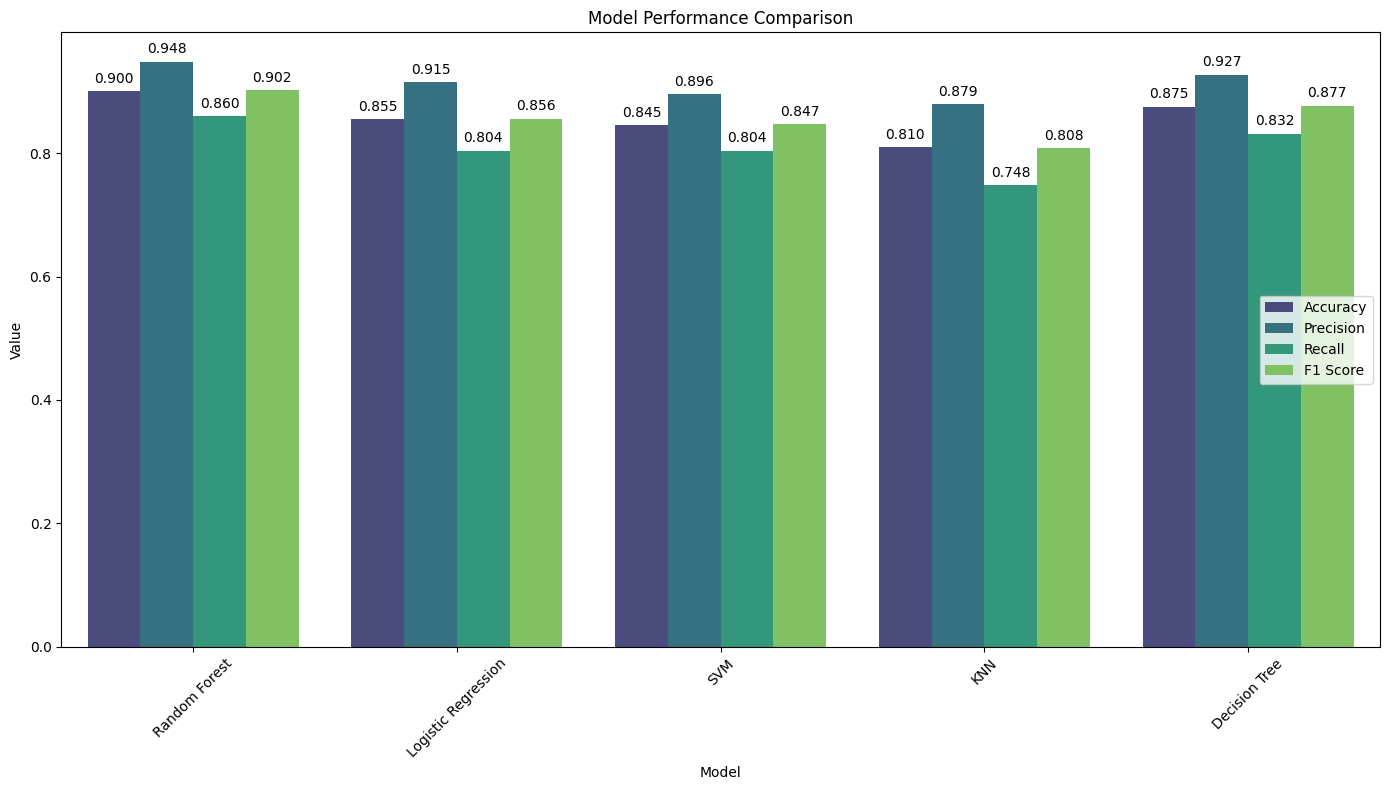

In [17]:

# Convert the dictionary to a DataFrame
df = pd.DataFrame(results)

# Melt the DataFrame to get a long format DataFrame
df_long = df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Plot using seaborn
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_long, x='Model', y='Value', hue='Metric', palette='viridis')


# Annotate each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
    
plt.title('Model Performance Comparison')
plt.legend(loc='center right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


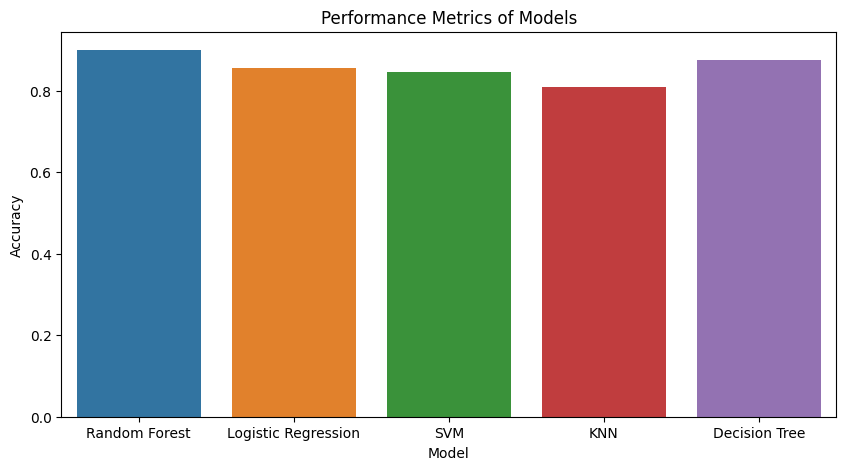

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(results_df, x=results_df.index, y="Accuracy")
plt.title("Performance Metrics of Models")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


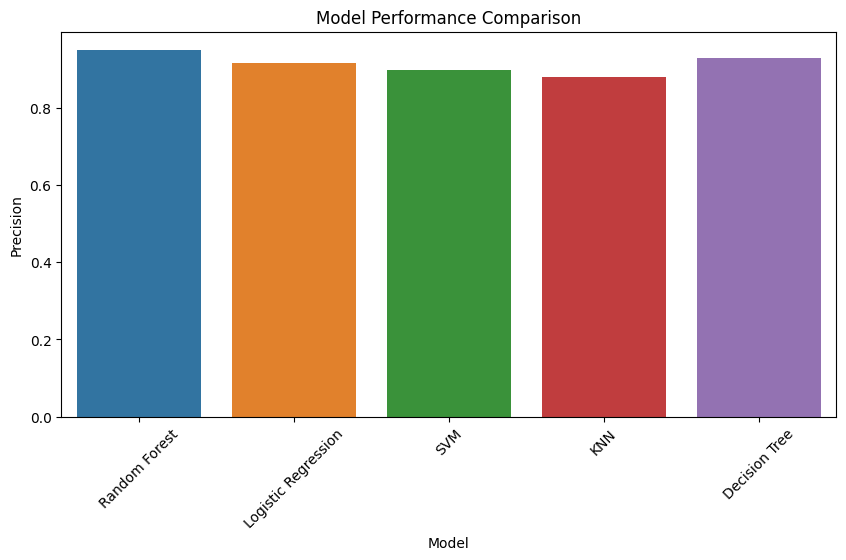

In [6]:
# create a table for the results
results_df

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x=results_df.index, y="Precision")
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Precision")
plt.xticks(rotation=45)
plt.show()
